In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (15, 10)

Link to data

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide


In [2]:
path = r'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

In [3]:
df = pd.read_csv(path, dayfirst=True, index_col='dateRep', parse_dates=['dateRep'])

In [4]:
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098
2020-07-22,22,7,2020,112,4,Afghanistan,AF,AFG,38041757.0,Asia,5.606997
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


List available countries

In [5]:
one = df['geoId'].unique()
two = df['countriesAndTerritories'].unique()
three = df['countryterritoryCode'].unique()
ter = pd.DataFrame([one, two, three]).transpose()

pd.options.display.max_rows = 300
ter

,0,1,2
0,AF,Afghanistan,AFG
1,AL,Albania,ALB
2,DZ,Algeria,DZA
3,AD,Andorra,AND
4,AO,Angola,AGO
5,AI,Anguilla,AIA
6,AG,Antigua_and_Barbuda,ATG
7,AR,Argentina,ARG
8,AM,Armenia,ARM
9,AW,Aruba,ABW


Function for get subtable with country data

In [6]:
def trans(df, ident, cases=50):
    new_df = df[df['geoId'] == ident]
    new_df['total'] = pd.Series()
    new_df = new_df.sort_values(by='dateRep', ascending=True)
    new_df['total'] = new_df['cases'].cumsum()
    new_df = new_df[new_df['total'] > cases]
    new_df['num'] = np.arange(len(new_df))
    return new_df

example

In [7]:
trans(df, 'RU')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,total,num
dateRep,,,,,,,,,,,,,
2020-03-15,15,3,2020,14,0,Russia,RU,RUS,145872260.0,Europe,0.039075,59,0
2020-03-16,16,3,2020,4,0,Russia,RU,RUS,145872260.0,Europe,0.041817,63,1
2020-03-17,17,3,2020,30,0,Russia,RU,RUS,145872260.0,Europe,0.061698,93,2
2020-03-18,18,3,2020,21,0,Russia,RU,RUS,145872260.0,Europe,0.075408,114,3
2020-03-19,19,3,2020,33,0,Russia,RU,RUS,145872260.0,Europe,0.098031,147,4
2020-03-20,20,3,2020,52,0,Russia,RU,RUS,145872260.0,Europe,0.133679,199,5
2020-03-21,21,3,2020,54,0,Russia,RU,RUS,145872260.0,Europe,0.166584,253,6
2020-03-22,22,3,2020,53,0,Russia,RU,RUS,145872260.0,Europe,0.202917,306,7
2020-03-23,23,3,2020,132,0,Russia,RU,RUS,145872260.0,Europe,0.293407,438,8


Graphic, for add new country insert item in id_list

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so

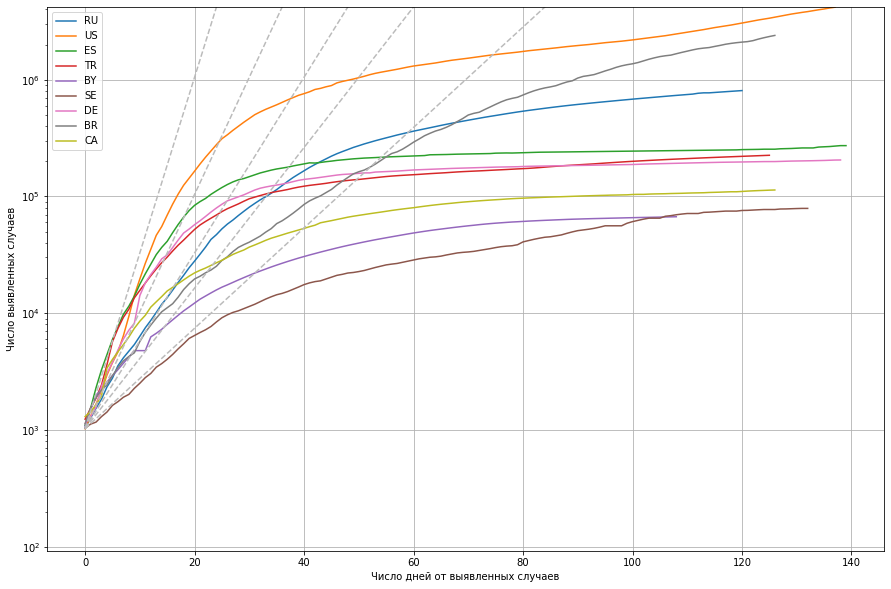

In [8]:
plt.figure()
id_list = ['RU', 'US', 'ES', 'TR', 'BY', 'SE', 'DE', 'BR', 'CA']
cases_min = None 
cases_max = None
day_max = None
for ident in id_list:
    new_df = trans(df, ident, cases=1000)
    if cases_min == None or cases_min > new_df['total'].min(): cases_min = new_df['total'].min()
    if cases_max == None or cases_max < new_df['total'].max(): cases_max = new_df['total'].max()
    if day_max   == None or day_max   < new_df['num'].max()  : day_max   = new_df['num'].max()
    plt.plot(new_df['num'], new_df['total'], label=ident)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('Число дней от выявленных случаев')
plt.ylabel('Число выявленных случаев')
for i in (2, 3, 4, 5, 7):
    days = np.arange(day_max+1)
    cases = cases_min * 2 ** (days/i)
    plt.plot(days, cases, '--', label='Удвоение за, дней {}'.format(i), color='#bbbbbb')
plt.ylim(top=cases_max)
#plt.xlim(right=41)
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so

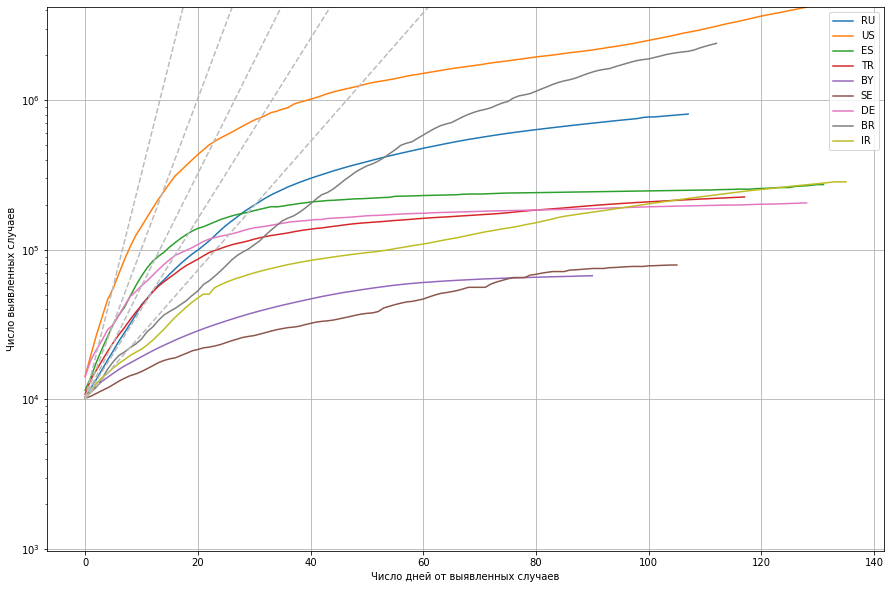

In [9]:
plt.figure()
id_list = ['RU', 'US', 'ES', 'TR', 'BY', 'SE', 'DE', 'BR', 'IR']
cases_min = None 
cases_max = None
day_max = None
for ident in id_list:
    new_df = trans(df, ident, cases=10000)
    if cases_min == None or cases_min > new_df['total'].min(): cases_min = new_df['total'].min()
    if cases_max == None or cases_max < new_df['total'].max(): cases_max = new_df['total'].max()
    if day_max   == None or day_max   < new_df['num'].max()  : day_max   = new_df['num'].max()
    plt.plot(new_df['num'], new_df['total'], label=ident)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('Число дней от выявленных случаев')
plt.ylabel('Число выявленных случаев')
for i in (2, 3, 4, 5, 7):
    days = np.arange(day_max+1)
    cases = cases_min * 2 ** (days/i)
    plt.plot(days, cases, '--', label='Удвоение за, дней {}'.format(i), color='#bbbbbb')
plt.ylim(top=cases_max)
#plt.xlim(right=41)
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so

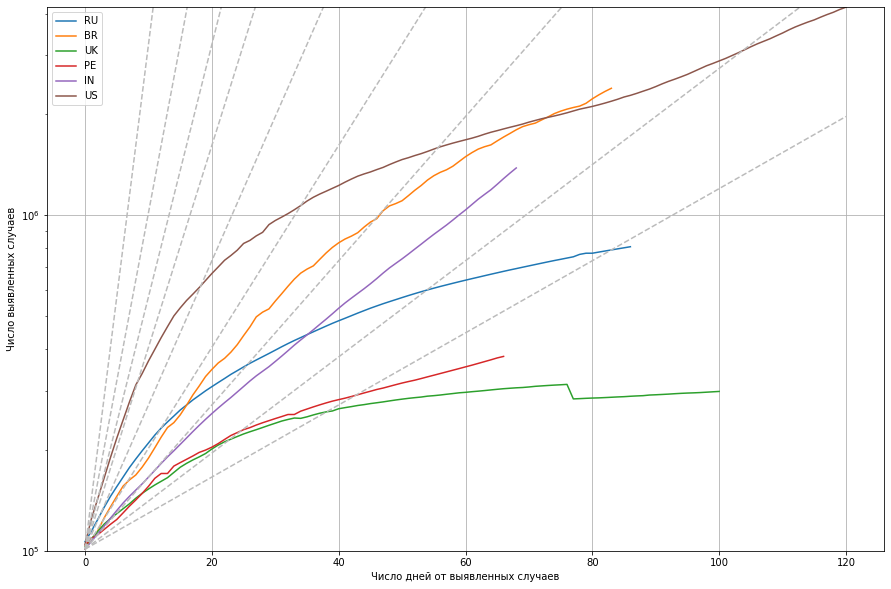

In [10]:
plt.figure()
id_list = ['RU', 'BR', 'UK', 'PE', 'IN', 'US']
cases_min = None 
cases_max = None
day_max = None
for ident in id_list:
    new_df = trans(df, ident, cases=100000)
    if cases_min == None or cases_min > new_df['total'].min(): cases_min = new_df['total'].min()
    if cases_max == None or cases_max < new_df['total'].max(): cases_max = new_df['total'].max()
    if day_max   == None or day_max   < new_df['num'].max()  : day_max   = new_df['num'].max()
    plt.plot(new_df['num'], new_df['total'], label=ident)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('Число дней от выявленных случаев')
plt.ylabel('Число выявленных случаев')
for i in (2, 3, 4, 5, 7, 10, 14, 21, 28):
    days = np.arange(day_max+1)
    cases = cases_min * 2 ** (days/i)
    plt.plot(days, cases, '--', label='Удвоение за, дней {}'.format(i), color='#bbbbbb')
plt.ylim(top=cases_max, bottom=100000)
#plt.xlim(right=41)
plt.show()